In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import cauchy, gamma

import emcee
print(emcee.__version__)

import edward as ed
import numpy as np
import tensorflow as tf
from tensorflow.contrib.distributions.python.ops import bijectors as bijector
from edward.models import Deterministic, Normal, Gamma, StudentT, Exponential, NormalWithSoftplusScale

import itertools

ds = tf.contrib.distributions

2.2.1


In [2]:
ed.set_seed(42)
sess = ed.get_session()

In [3]:
num_points = 1000 # [100, 10000, 1000000]

In [4]:
mu_true = 5.0
sigma_true = 1.0

In [5]:
def build_dataset(N):
    x = Normal(loc=mu_true, scale=sigma_true, sample_shape=N)
    return sess.run(x)

In [6]:
x_train = build_dataset(num_points)

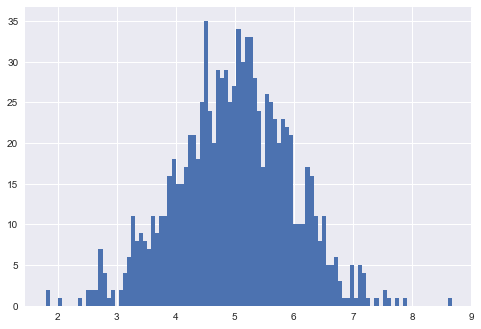

In [7]:
plt.hist(x_train, bins=100)
plt.show()

In [8]:
N = x_train.shape[0]  # number of data points

In [9]:
p_mu = Normal([0.0],[1.0])
p_sigma = Gamma([1.0],[1.0])

In [10]:
x = Normal(tf.tile(p_mu,[N]), tf.tile(p_sigma,[N]))

In [11]:
q_mu = NormalWithSoftplusScale(loc=tf.Variable([0.5]),
            scale=tf.Variable([2.3]))

q_sigma = Exponential(tf.nn.softplus(tf.Variable([1.0])))


In [12]:
inference = ed.KLqp({p_mu: q_mu, p_sigma: q_sigma}, data={x: x_train})

In [13]:
inference.run(n_iter=2000, n_print=200, n_samples=10)

2000/2000 [100%] ██████████████████████████████ Elapsed: 32s | Loss: 4649.825


### Mean

In [14]:
T = 10000
mu_sample = sess.run(p_mu.sample(sample_shape=T))
q_mu_sample = sess.run(q_mu.sample(sample_shape=T))

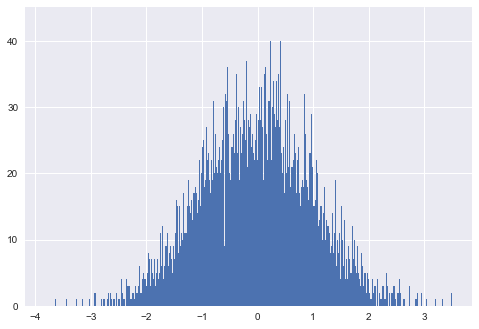

In [15]:
plt.hist(mu_sample, bins=1000)
plt.show()

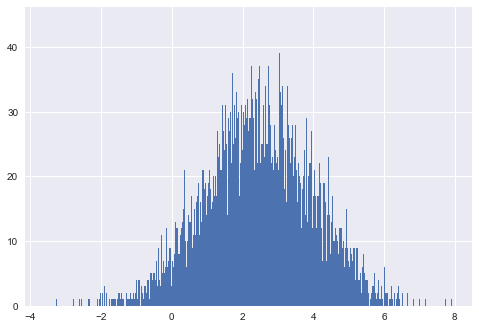

In [16]:
plt.hist(q_mu_sample, bins=1000)
plt.show()

### Variance

In [17]:
T = 10000
sigma_sample = sess.run(p_sigma.sample(sample_shape=T))
q_sigma_sample = sess.run(q_sigma.sample(sample_shape=T))

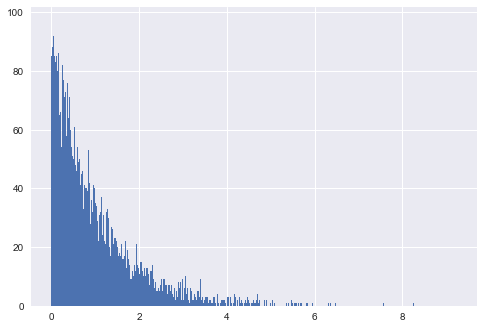

In [18]:
plt.hist(sigma_sample, bins=1000)
plt.show()

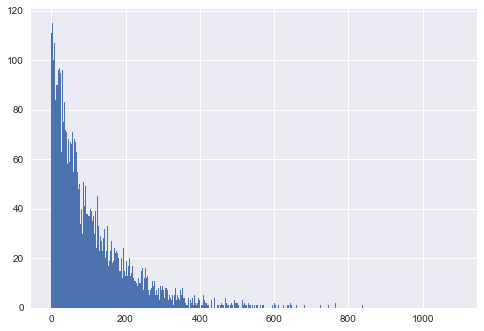

In [19]:
plt.hist(q_sigma_sample, bins=1000)
plt.show()